In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

from run_stMDA import run_stMDA

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
adata = sc.read_h5ad('../PDAC/adata/GSM6505134_DonorB_FFPE-probes.h5ad')

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor='seurat_v3', subset=True)

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
sc.pp.log1p(adata)

In [5]:
run_stMDA(adata, alpha1=0.5, alpha2=0.5, use_image=False)

100%|█████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 40.04it/s, loss: 7.676e+02]


In [6]:
sc.pp.neighbors(adata, use_rep='qz')

In [7]:
sc.tl.leiden(adata, resolution=0.4)
adata

AnnData object with n_obs × n_vars = 3232 × 3001
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'neighbors', 'leiden'
    obsm: 'spatial', 'qz'
    layers: 'x4'
    obsp: 'distances', 'connectivities'

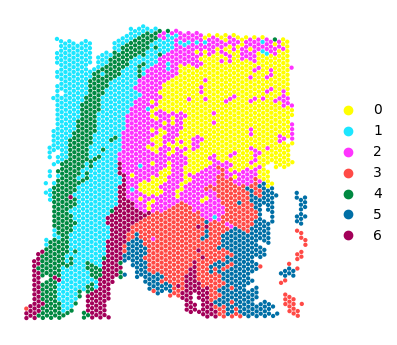

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

sc.pl.spatial(
    adata,
    img_key=None,
    color='leiden',
    size=1.4,
    palette=sc.pl.palettes.default_102,
    legend_loc='right margin',
    frameon=False,
    title='',
    show=False,
    ax=ax,
)

ax.legend(
    frameon=False,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    ncol=1,
    fontsize=None,
)

ax.set_aspect('equal')

plt.tight_layout()